In [4]:
import pandas as pd
import yfinance as yf
from datetime import datetime

# Parameters
ticker = "AAPL"
start = datetime(2020,1,1)
end = datetime(2024,10,22)

# Fetch data
df = yf.download(ticker, start=start, end=end)

# Preview
print(df.head(20))


/tmp/ipython-input-869641403.py:11: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)
[*********************100%***********************]  1 of 1 completed

Price           Close       High        Low       Open     Volume
Ticker           AAPL       AAPL       AAPL       AAPL       AAPL
Date                                                             
2020-01-02  72.538528  72.598907  71.292319  71.545905  135480400
2020-01-03  71.833305  72.594071  71.608700  71.765682  146322800
2020-01-06  72.405678  72.444321  70.703012  70.954188  118387200
2020-01-07  72.065140  72.671333  71.845362  72.415330  108872000
2020-01-08  73.224403  73.526295  71.768079  71.768079  132079200
2020-01-09  74.779770  74.972978  73.951381  74.202550  170108400
2020-01-10  74.948807  75.513954  74.446462  75.014020  140644800
2020-01-13  76.550056  76.576627  75.146865  75.265211  121532000
2020-01-14  75.516373  76.697376  75.393206  76.487261  161954400
2020-01-15  75.192749  76.197445  74.760438  75.315923  121923600
2020-01-16  76.134644  76.245745  75.373878  75.736148  108829200
2020-01-17  76.977539  76.979949  76.076692  76.383411  137816400
2020-01-21

In [6]:
import pandas as pd

# Suppose df is your original DataFrame with stock 'Close' data
# Select first 5 indices:
idx = df['Close'].index[:20]

# Make a new dataframe:
x1 = pd.DataFrame({'NewData': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]}, index=idx)

print(x1)


            NewData
Date               
2020-01-02        1
2020-01-03        2
2020-01-06        3
2020-01-07        4
2020-01-08        5
2020-01-09        6
2020-01-10        7
2020-01-13        8
2020-01-14        9
2020-01-15       10
2020-01-16       11
2020-01-17       12
2020-01-21       13
2020-01-22       14
2020-01-23       15
2020-01-24       16
2020-01-27       17
2020-01-28       18
2020-01-29       19
2020-01-30       20


In [8]:
import pandas as pd
# assume df is your original DataFrame with Date index and Close column.

df2 = df.reset_index()
df3 = df2[['Date','Close']].copy()
df3 = df3.reset_index().rename(columns={'index':'Idx'})
print(df3.head(20))



Price  Idx       Date      Close
Ticker                      AAPL
0        0 2020-01-02  72.538528
1        1 2020-01-03  71.833305
2        2 2020-01-06  72.405678
3        3 2020-01-07  72.065140
4        4 2020-01-08  73.224403
5        5 2020-01-09  74.779770
6        6 2020-01-10  74.948807
7        7 2020-01-13  76.550056
8        8 2020-01-14  75.516373
9        9 2020-01-15  75.192749
10      10 2020-01-16  76.134644
11      11 2020-01-17  76.977539
12      12 2020-01-21  76.455872
13      13 2020-01-22  76.728775
14      14 2020-01-23  77.098282
15      15 2020-01-24  76.876083
16      16 2020-01-27  74.615517
17      17 2020-01-28  76.726357
18      18 2020-01-29  78.332420
19      19 2020-01-30  78.218887


In [9]:
import pandas as pd

# Make sure Date column is datetime:
df3['Date'] = pd.to_datetime(df3['Date'])

# Option A: If you want to keep the default integer index as a column "Idx":
df4 = df3[['Idx', 'Date', 'Close']].copy()

# Rename “Idx” column to something like “Index” if you prefer:
df4 = df4.rename(columns={'Idx':'Index'})

print(df4.head(20))


Price  Index       Date      Close
Ticker                        AAPL
0          0 2020-01-02  72.538528
1          1 2020-01-03  71.833305
2          2 2020-01-06  72.405678
3          3 2020-01-07  72.065140
4          4 2020-01-08  73.224403
5          5 2020-01-09  74.779770
6          6 2020-01-10  74.948807
7          7 2020-01-13  76.550056
8          8 2020-01-14  75.516373
9          9 2020-01-15  75.192749
10        10 2020-01-16  76.134644
11        11 2020-01-17  76.977539
12        12 2020-01-21  76.455872
13        13 2020-01-22  76.728775
14        14 2020-01-23  77.098282
15        15 2020-01-24  76.876083
16        16 2020-01-27  74.615517
17        17 2020-01-28  76.726357
18        18 2020-01-29  78.332420
19        19 2020-01-30  78.218887


In [10]:
print(df4.columns)


MultiIndex([('Index',     ''),
            ( 'Date',     ''),
            ('Close', 'AAPL')],
           names=['Price', 'Ticker'])


In [11]:
series_close = df4['Close']


In [12]:
df4['EWM_Close'] = series_close.ewm(alpha=0.1).mean()
print(df4[['Close','EWM_Close']].head(20))


Price       Close  EWM_Close
Ticker       AAPL           
0       72.538528  72.538528
1       71.833305  72.167358
2       72.405678  72.255299
3       72.065140  72.200004
4       73.224403  72.450157
5       74.779770  72.947343
6       74.948807  73.330984
7       76.550056  73.896197
8       75.516373  74.160681
9       75.192749  74.319138
10      76.134644  74.583716
11      76.977539  74.917317
12      76.455872  75.123609
13      76.728775  75.331739
14      77.098282  75.554195
15      76.876083  75.716450
16      74.615517  75.584322
17      76.726357  75.718694
18      78.332420  76.020888
19      78.218887  76.271109


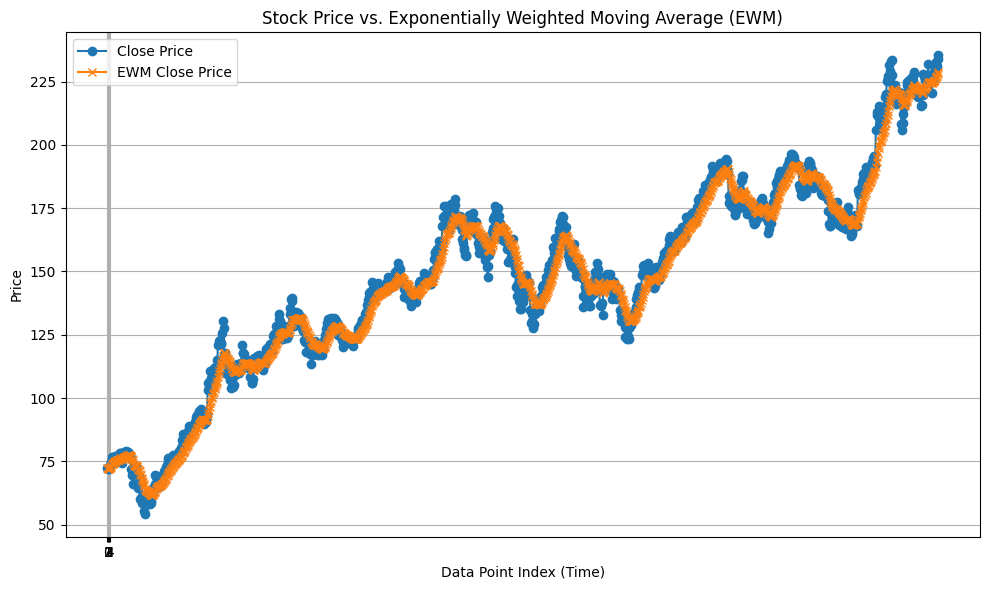

In [14]:
import matplotlib.pyplot as plt
import pandas as pd
import io


# --- 2. Plotting Code using Matplotlib ---
plt.figure(figsize=(10, 6))

# Plot the 'Close' prices
plt.plot(df4.index, df4['Close'], label='Close Price', marker='o')

# Plot the 'EWM_Close' prices
plt.plot(df4.index, df4['EWM_Close'], label='EWM Close Price', marker='x')

# Add titles and labels for clarity
plt.title('Stock Price vs. Exponentially Weighted Moving Average (EWM)')
plt.xlabel('Data Point Index (Time)')
plt.ylabel('Price')

# Add a legend to distinguish the lines
plt.legend()

# Add a grid for easier readability
plt.grid(True)

# Ensure all index points are shown on the x-axis
plt.xticks(df.index)

# Adjust layout to prevent labels from being cut off
plt.tight_layout()

# Save the figure to a file (or use plt.show() to display it interactively)
plt.savefig('close_vs_ewm_close_plot.png')
# plt.show()
